In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [2]:
# Read trips text files into pandas dataframe
df_16 = pd.read_csv("/home/student/files/rt_trips_2016_I_DB.txt", sep=';')
df_17 = pd.read_csv("/home/student/files/rt_trips_2017_I_DB.txt", sep=';')

In [6]:
df_16.tail(3)

,datasource,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,basin,tenderlot,suppressed,justificationid,lastupdate,note
929504,DB,24-MAY-16 00:00:00,3045238,140,140_21,2,29904,26400,29557.0,26398.0,BasDef,NaN,NaN,NaN,13-JUN-16 09:41:18,",2423128,"
929505,DB,24-MAY-16 00:00:00,3045297,238,238_11,1,33170,31500,33193.0,31508.0,BasDef,NaN,NaN,NaN,13-JUN-16 09:41:18,",1735257,"
929506,DB,24-MAY-16 00:00:00,3045317,65B,65B_66,2,44921,41400,44433.0,41418.0,BasDef,NaN,NaN,NaN,13-JUN-16 09:41:18,",2341266,"


In [4]:
df_17.tail(3)

,datasource,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,basin,tenderlot,suppressed,justificationid,lastupdate,note
1111905,DB,26-JAN-17 00:00:00,4095098,140,140_21,2,30652,27300,30939.0,27285.0,BasDef,NaN,NaN,NaN,16-FEB-17 15:03:42,",2411462,"
1111906,DB,26-JAN-17 00:00:00,4093736,151,151_17,2,32868,27900,33040.0,27858.0,BasDef,NaN,NaN,NaN,16-FEB-17 15:03:42,",2594649,"
1111907,DB,26-JAN-17 00:00:00,4093795,151,151_16,1,73746,70200,NaN,70190.0,BasDef,NaN,NaN,NaN,16-FEB-17 15:03:42,",2606289,"


In [5]:
# Concat dataframes into one
df = pd.concat([df_16, df_17], join="inner")

In [7]:
# Check that dataframes have been concated using row count

print(df_16.shape)
print(df_17.shape)

print(df.shape)

(929507, 16)
(1111908, 16)
(2041415, 16)


In [8]:
# Drop unnecessary columns
df = df.drop(['datasource', 'basin', 'tenderlot', 'suppressed', 'justificationid', 'lastupdate', 'note'], axis=1)

In [9]:
df.head(1)

,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep
0,09-FEB-16 00:00:00,2824642,145,145_105,2,45668,40800,45375.0,40782.0


In [10]:
# Create column which gives the date and time of departure in datetime format

df['full_departure_time'] = pd.to_datetime(df['dayofservice']) + pd.to_timedelta(df['actualtime_dep'], unit='s')

In [11]:
# Set this column (full_departure_time') as index

df.set_index('full_departure_time', inplace=True, drop=True)

In [22]:
# Create column showing total journey_time (in seconds)

df['journey_time'] = (df['actualtime_arr'] - df['actualtime_dep']).apply(lambda x: x if (x >= 0 and x != np.nan) else 0)

In [23]:
df.head(5)

,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,journey_time
full_departure_time,,,,,,,,,,
2016-02-09 11:19:42,09-FEB-16 00:00:00,2824642,145,145_105,2,45668,40800,45375.0,40782.0,4593.0
2016-02-09 16:49:42,09-FEB-16 00:00:00,2826717,9,9_7,2,65553,60600,66258.0,60582.0,5676.0
2016-02-09 17:14:38,09-FEB-16 00:00:00,2826730,54A,54A_12,2,65951,62100,66053.0,62078.0,3975.0
2016-02-09 13:59:43,09-FEB-16 00:00:00,2826743,7,7_51,1,54763,50400,54854.0,50383.0,4471.0
2016-02-09 06:22:11,09-FEB-16 00:00:00,2812908,39,39_20,1,27375,22920,27318.0,22931.0,4387.0


In [64]:
# Note: No buses running at 1 o'clock in the morning

df.loc[df.index.hour == 1].head(10)

,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,journey_time
full_departure_time,,,,,,,,,,


In [65]:
# Note: No buses running at 3 o'clock in the morning

df.loc[df.index.hour == 3].head(10)

,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,journey_time
full_departure_time,,,,,,,,,,


In [55]:
# Create df containing only journey time indexed by datetime

chart_df = df['journey_time']
chart_df.head(5)

full_departure_time
2016-02-09 11:19:42    4593.0
2016-02-09 16:49:42    5676.0
2016-02-09 17:14:38    3975.0
2016-02-09 13:59:43    4471.0
2016-02-09 06:22:11    4387.0
Name: journey_time, dtype: float64

In [67]:
# Group dataset by day of week, by hour of day

group = pd.DataFrame(chart_df.groupby([chart_df.index.dayofweek.rename('weekday'), chart_df.index.hour.rename('hour')]).mean().unstack(level=0))

In [68]:
group.columns = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

In [69]:
group

,mon,tue,wed,thu,fri,sat,sun
hour,,,,,,,
0.0,2129.714286,1993.125926,1984.351724,1993.157143,2117.310345,2152.841727,2120.930070
2.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4.0,3597.433333,3722.857143,3592.066667,3451.015625,3731.245283,4473.777778,NaN
5.0,3287.206514,3241.942308,3249.417864,3271.237550,3269.886059,2956.638298,NaN
6.0,3413.549884,3432.587708,3434.986375,3428.912415,3359.604022,2822.593094,2334.815789
7.0,3974.958077,4013.721668,4040.293943,4007.105210,3808.690326,2684.334312,3005.946981
8.0,3946.031884,3986.981393,4035.104684,4029.163543,3874.184528,2956.931159,3041.561296
9.0,3410.337904,3482.262615,3520.314927,3527.303456,3504.703495,3180.128563,3071.763806
10.0,3443.209575,3528.501545,3553.057201,3577.597464,3611.134765,3393.390559,3110.830187


In [70]:
# Save group df to csv so the entire notebook doesn't have to be reloaded

group.to_csv('hourly_journey_time.csv')

In [81]:
# Open csv file containing group data

group = pd.read_csv('hourly_journey_time.csv')

In [82]:
# Reset index

group.set_index('hour', inplace=True, drop=True)

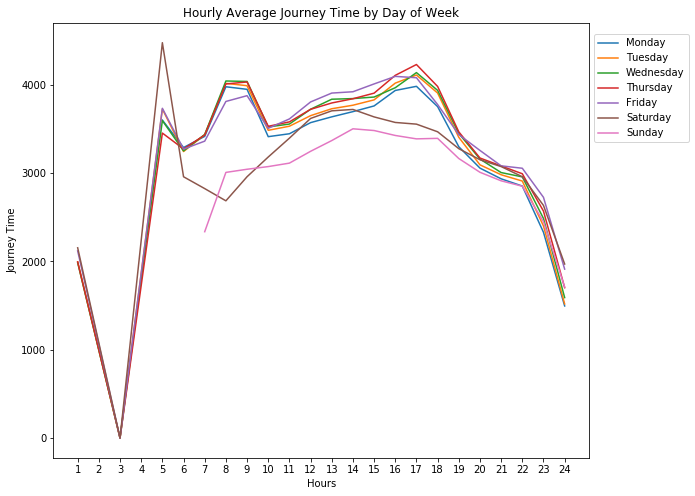

In [83]:
# Create chart for all days
fig, ax = plt.subplots(figsize=(12, 8))

dim = np.arange(1, 24)

# Use ax for both
group['mon'].plot(x=group.index, y='journey_time', ax=ax, label="Monday")
group['tue'].plot(x=group.index, y='journey_time', ax=ax, label="Tuesday")
group['wed'].plot(x=group.index, y='journey_time', ax=ax, label="Wednesday")
group['thu'].plot(x=group.index, y='journey_time', ax=ax, label="Thursday")
group['fri'].plot(x=group.index, y='journey_time', ax=ax, label="Friday")
group['sat'].plot(x=group.index, y='journey_time', ax=ax, label="Saturday")
group['sun'].plot(x=group.index, y='journey_time', ax=ax, label="Sunday")

ax.set_title("Hourly Average Journey Time by Day of Week")
ax.set_xlabel('Hours')
ax.set_ylabel('Journey Time')
ax.set_xticks(np.arange(0, 24))
ax.set_xticklabels([str(i) for i in range(1, 25)])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))

plt.show()

In [104]:
# Note huge spike on saturday around 5 - what is going on?

df.loc[(df.index.dayofweek == 5) & (df.index.hour == 5)].sort_values(by=['journey_time'], ascending=False).head(10)

,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,journey_time
full_departure_time,,,,,,,,,,
2016-06-18 05:15:05,18-JUN-16 00:00:00,3215930,84,84_30,2,22980,18900,25294.0,18905.0,6389.0
2017-06-03 05:15:58,03-JUN-17 00:00:00,5011336,84,84_30,2,22980,18900,25238.0,18958.0,6280.0
2017-06-17 05:15:16,17-JUN-17 00:00:00,5011336,84,84_30,2,22980,18900,25034.0,18916.0,6118.0
2017-01-07 05:29:32,07-JAN-17 00:00:00,4090737,27,27_19,1,23163,19800,25800.0,19772.0,6028.0
2016-06-18 05:31:43,18-JUN-16 00:00:00,3220695,65,65_72,1,24876,20400,25496.0,19903.0,5593.0
2017-06-10 05:40:11,10-JUN-17 00:00:00,5011845,65,65_72,1,24779,20400,25922.0,20411.0,5511.0
2017-03-11 05:29:55,11-MAR-17 00:00:00,4380645,27,27_17,2,23307,19800,25246.0,19795.0,5451.0
2016-01-30 05:39:32,30-JAN-16 00:00:00,2780627,65,65_72,1,24418,20400,25807.0,20372.0,5435.0
2016-05-28 05:39:45,28-MAY-16 00:00:00,3041322,65,65_72,1,25648,20400,25797.0,20385.0,5412.0


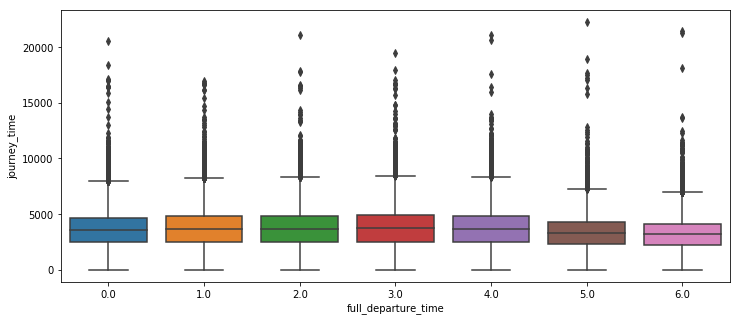

In [113]:
# View distribution of journey times by day of week (note outliers)

fig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(chart_df.index.dayofweek, chart_df, ax=ax)

plt.show()

In [112]:
# Here are the top 10 longest journey times - outliers which need to be stripped from the dataset
# Possible bus broke down or something...

df.sort_values(by=['journey_time'], ascending=False).head(10)

,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,journey_time
full_departure_time,,,,,,,,,,
2016-06-25 12:48:38,25-JUN-16 00:00:00,3262805,27,27_17,2,52660,46200,68359.0,46118.0,22241.0
2016-03-20 09:30:21,20-MAR-16 00:00:00,2901688,65,65_77,2,37609,34200,55666.0,34221.0,21445.0
2017-05-21 09:31:40,21-MAY-17 00:00:00,4885593,65,65_77,2,37560,34200,55624.0,34300.0,21324.0
2016-06-15 10:29:08,15-JUN-16 00:00:00,3216999,111,111_4,2,59124,57600,58898.0,37748.0,21150.0
2016-05-06 10:35:13,06-MAY-16 00:00:00,3026016,111,111_4,2,59049,57600,59230.0,38113.0,21117.0
2017-05-05 10:30:08,05-MAY-17 00:00:00,4601228,44,44_37,1,43530,37800,58448.0,37808.0,20640.0
2017-05-22 08:31:15,22-MAY-17 00:00:00,4897605,7A,7A_87,2,35222,30600,51231.0,30675.0,20556.0
2017-06-15 18:05:28,15-JUN-17 00:00:00,5015231,65,65_77,2,68887,64800,84598.0,65128.0,19470.0
2016-03-19 11:12:41,19-MAR-16 00:00:00,2901940,39,39_21,2,45391,40500,59352.0,40361.0,18991.0


In [84]:
# Remove buses running from 2 and 4 - they distort the chart due to low journey times and no buses running at 1 and 3

group = group.drop([2, 4, 5])

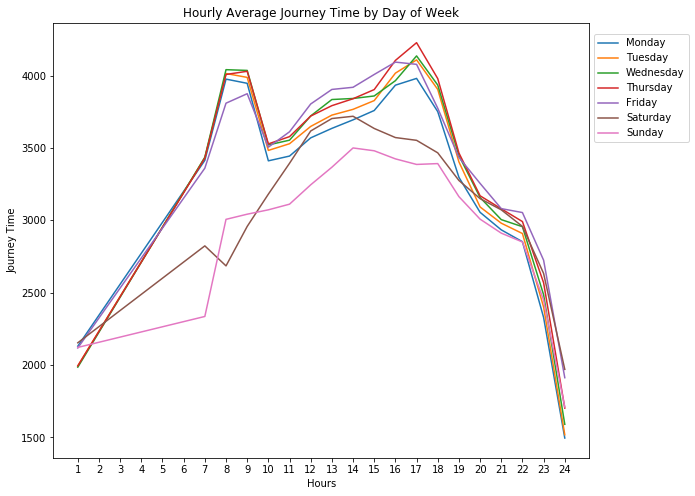

In [85]:
# Create chart for all days
fig, ax = plt.subplots(figsize=(12, 8))

dim = np.arange(1, 24)

# Use ax for both
group['mon'].plot(x=group.index, y='journey_time', ax=ax, label="Monday")
group['tue'].plot(x=group.index, y='journey_time', ax=ax, label="Tuesday")
group['wed'].plot(x=group.index, y='journey_time', ax=ax, label="Wednesday")
group['thu'].plot(x=group.index, y='journey_time', ax=ax, label="Thursday")
group['fri'].plot(x=group.index, y='journey_time', ax=ax, label="Friday")
group['sat'].plot(x=group.index, y='journey_time', ax=ax, label="Saturday")
group['sun'].plot(x=group.index, y='journey_time', ax=ax, label="Sunday")

ax.set_title("Hourly Average Journey Time by Day of Week")
ax.set_xlabel('Hours')
ax.set_ylabel('Journey Time')
ax.set_xticks(np.arange(0, 24))
ax.set_xticklabels([str(i) for i in range(1, 25)])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))

plt.show()

In [118]:
# Search trips by route id, day of service, first few numbers of plannedtime of departure....

df.loc[(df['routeid'] == '77A_29') & (df['dayofservice'] == '30-JAN-16 00:00:00') & (str(df['plannedtime_dep']).startswith('27'))].head(10)

,dayofservice,tripid,lineid,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,journey_time
full_departure_time,,,,,,,,,,
